In [2]:
from env import host, username, password
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
import acquire as ac
import prepare as prep
import analysis as an
import explore as ex
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, accuracy_score
import knn_lesson_util as util
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Decision Tree Exercises
Using the titanic data, in your classification-exercises repository, create a notebook, model.ipynb where you will do the following:

### 1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [5]:
df_titanic = ac.get_titanic_data()
df_titanic

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,None,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,None,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [6]:
df_titanic.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

In [7]:
train, validate, test = prep.prep_titanic_data(df_titanic)
train.head()

/Users/parkervoit/Desktop/codeup-data-science/classifications-exercises/prepare.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[['embark_town']] = imputer.transform(test[['embark_town']])
/Users/parkervoit/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
474,0,3,0,0,9.8375,1,0,0,1
370,1,1,1,0,55.4417,0,1,0,0
573,1,3,0,0,7.7500,1,0,1,0
110,0,1,0,0,52.0000,1,1,0,1
167,0,3,1,4,27.9000,0,0,0,1


In [8]:
train.survived.value_counts()

0    307
1    191
Name: survived, dtype: int64

In [9]:
train['baseline'] = 0

In [10]:
baseline_accuracy = (train.baseline == train.survived).mean()
print(f'Baseline accuracy is {baseline_accuracy:.2%}')

Baseline accuracy is 61.65%


### 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [11]:
X_cols = ['pclass', 'sex_male', 'alone']
y_col = 'survived'
X_train, y_train = train[X_cols], train[y_col]
X_validate, y_validate = validate[X_cols], validate[y_col]
X_test, y_test = test[X_cols], test[y_col]

In [85]:
model1 = DecisionTreeClassifier()
model1.fit(X_train, y_train)

DecisionTreeClassifier()

In [86]:
print(f'training score: {model1.score(X_train, y_train):.2%}')
print(f'validate score: {model1.score(X_validate, y_validate):.2%}')

training score: 81.33%
validate score: 74.30%


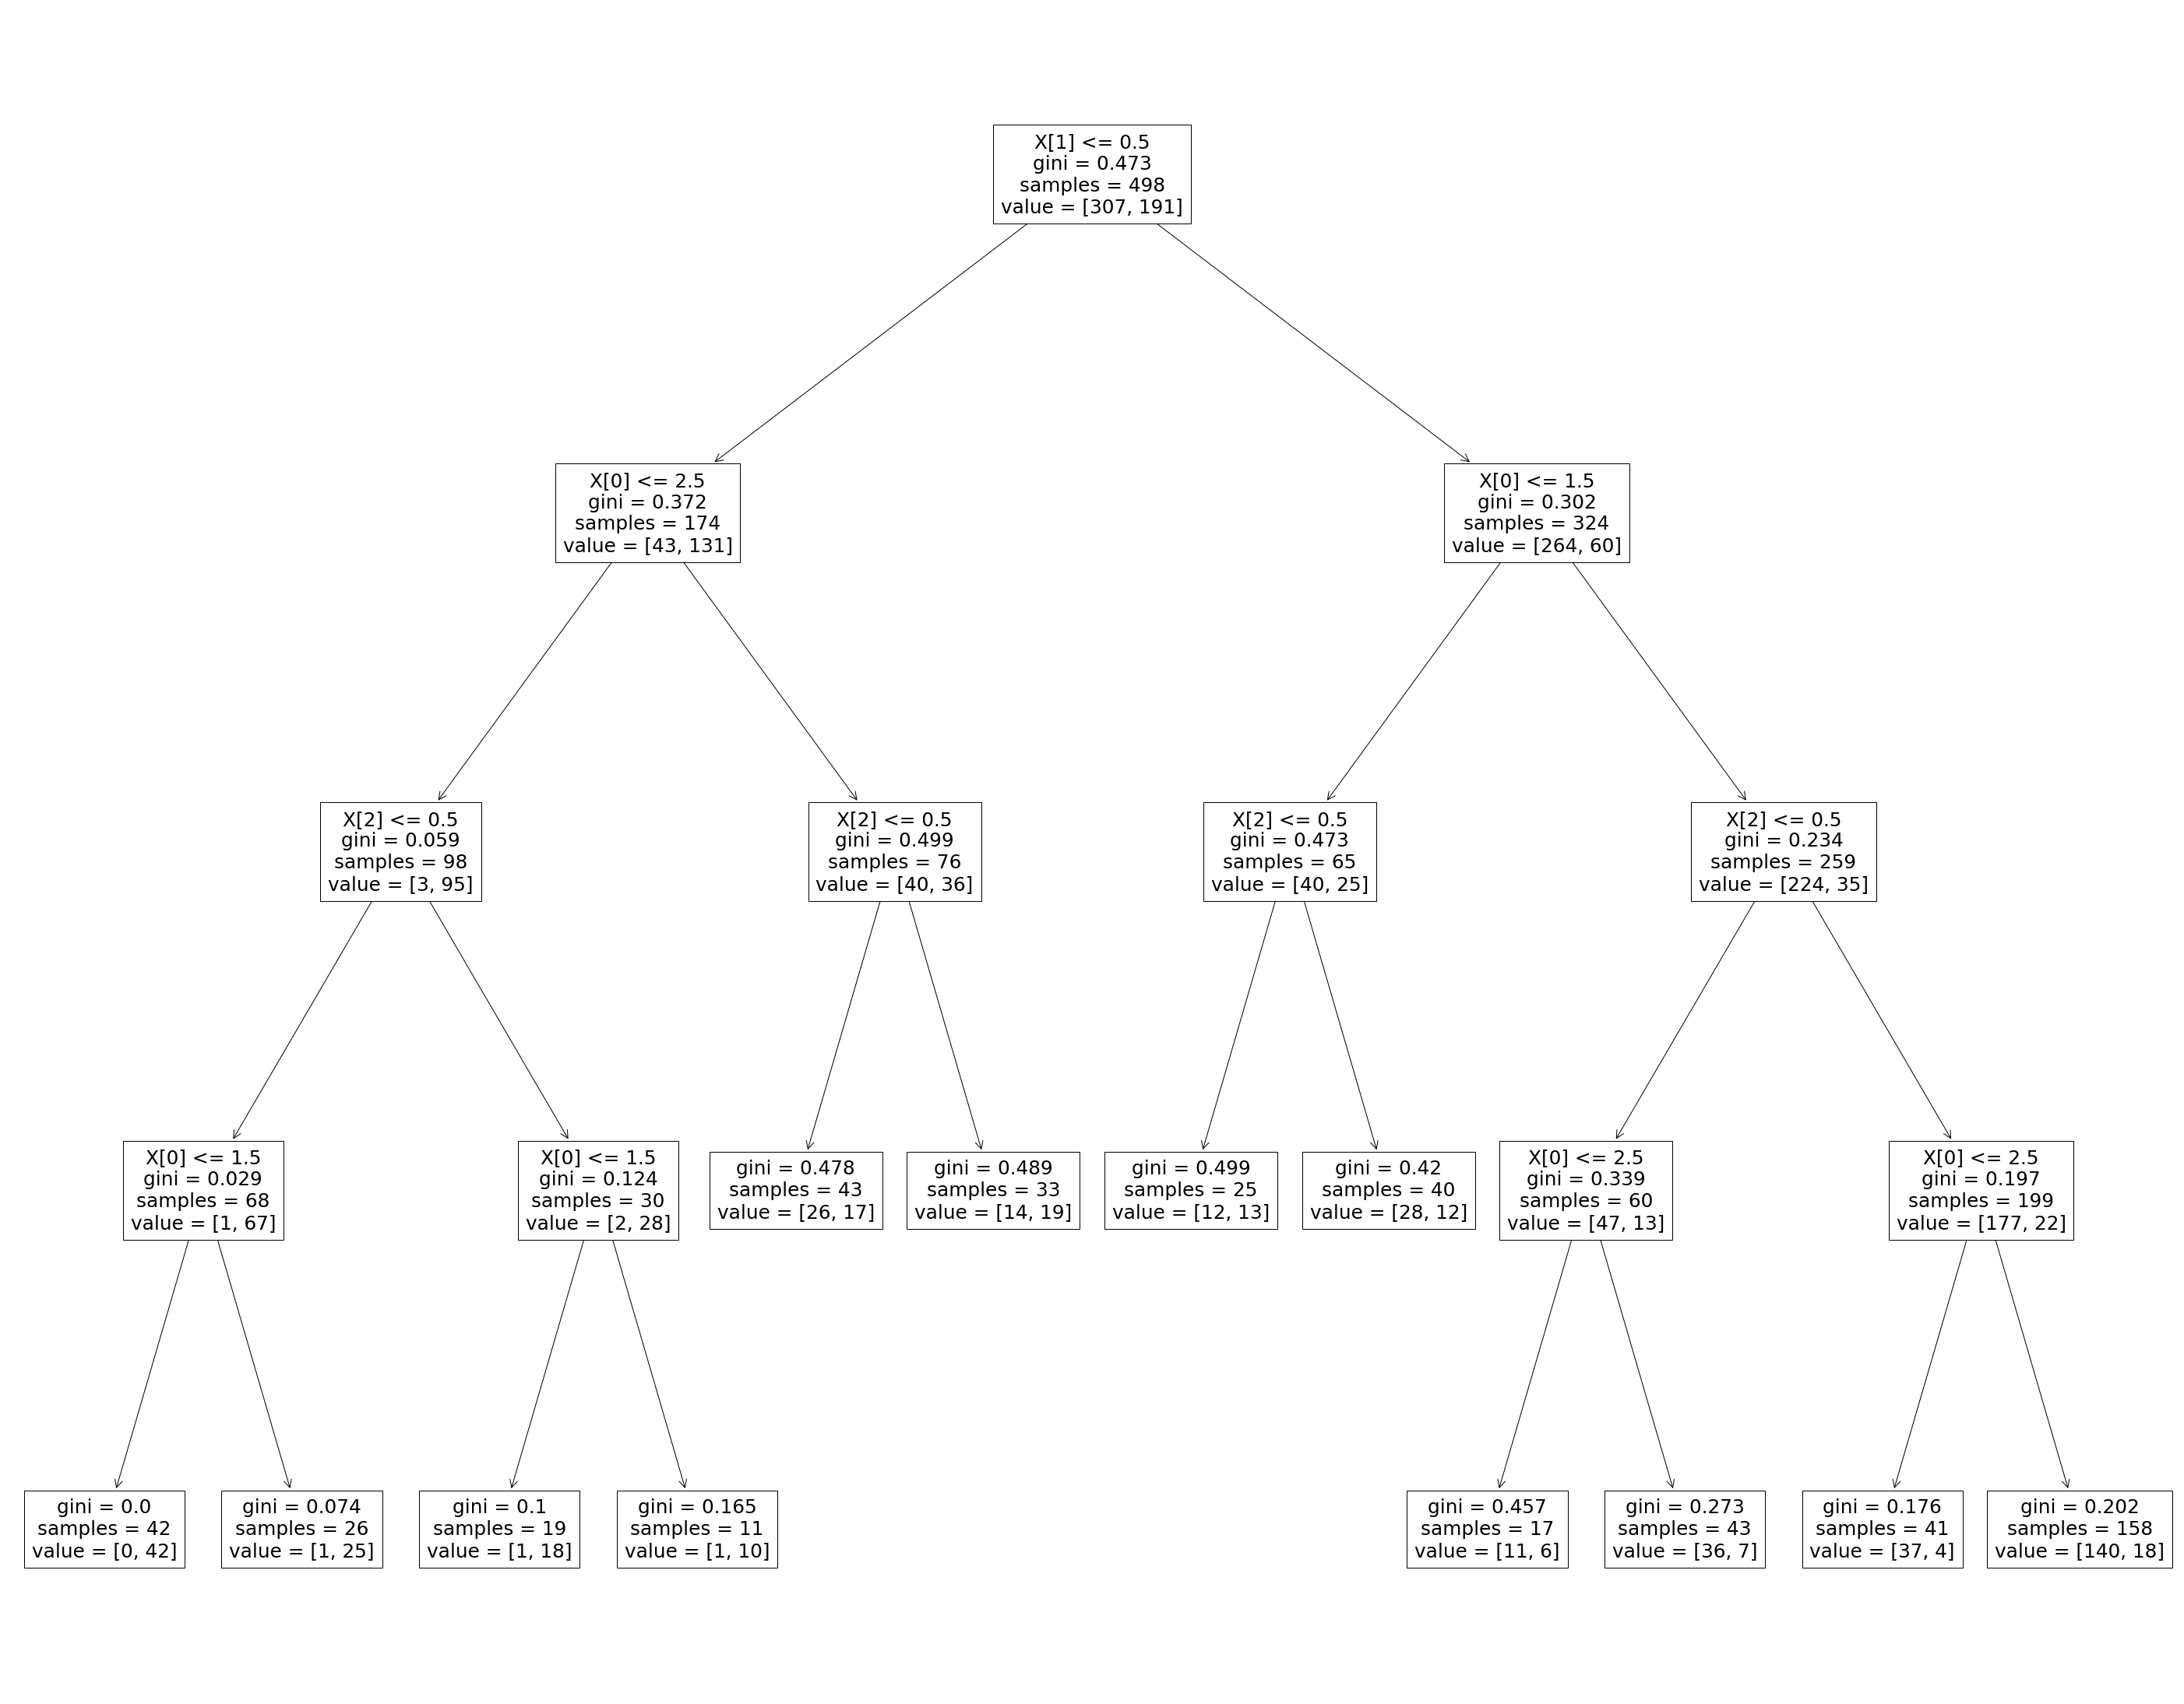

In [87]:
plt.figure(figsize = [50,40])
plt.show(plot_tree(model1))

In [88]:
train['model1_pred'] = model1.predict(X_train)

In [89]:
train

,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton,baseline,model1_pred
474,0,3,0,0,9.8375,1,0,0,1,0,1
370,1,1,1,0,55.4417,0,1,0,0,0,1
573,1,3,0,0,7.7500,1,0,1,0,0,1
110,0,1,0,0,52.0000,1,1,0,1,0,0
167,0,3,1,4,27.9000,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
735,0,3,0,0,16.1000,1,1,0,1,0,0
163,0,3,0,0,8.6625,1,1,0,1,0,0
770,0,3,0,0,9.5000,1,1,0,1,0,0
196,0,3,0,0,7.7500,1,1,1,0,0,0


In [90]:
validate['model1_pred'] = model1.predict(X_validate)
validate

,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton,model1_pred
569,1,3,0,0,7.8542,1,1,0,1,0
532,0,3,1,1,7.2292,0,1,0,0,0
223,0,3,0,0,7.8958,1,1,0,1,0
35,0,1,1,0,52.0000,0,1,0,1,1
93,0,3,1,2,20.5750,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
91,0,3,0,0,7.8542,1,1,0,1,0
258,1,1,0,0,512.3292,1,0,0,0,1
186,1,3,1,0,15.5000,0,0,1,0,0
108,0,3,0,0,7.8958,1,1,0,1,0


In [91]:
print(classification_report(train.survived, train.model1_pred))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       307
           1       0.81      0.66      0.73       191

    accuracy                           0.81       498
   macro avg       0.81      0.79      0.79       498
weighted avg       0.81      0.81      0.81       498



In [ ]:
X_train, y_train = train[X_cols], train[y_col]
X_validate, y_validate = validate[X_cols], validate[y_col]
X_test, y_test = test[X_cols], test[y_col]

In [92]:
print(f'Train model is {model1.score(X_train, y_train):.2%}')
print(f'Validate model is {model1.score(X_validate, y_validate):.2%}')

Train model is 81.33%
Validate model is 74.30%


In [93]:
matrix1 = confusion_matrix(train.survived, train.model1_pred)
matrix1

array([[278,  29],
       [ 64, 127]])

### 4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [94]:
print(classification_report(validate.survived, validate.model1_pred))

              precision    recall  f1-score   support

           0       0.76      0.86      0.80       132
           1       0.71      0.56      0.63        82

    accuracy                           0.74       214
   macro avg       0.73      0.71      0.72       214
weighted avg       0.74      0.74      0.74       214



In [95]:
val_matrix1 = confusion_matrix(validate.survived, validate.model1_pred)
val_matrix1

array([[113,  19],
       [ 36,  46]])

In [96]:
print(f'Validate model accuracy is {model1.score(X_validate, y_validate):.2%}')

Validate model accuracy is 74.30%


In [97]:
tpr = val_matrix1[1][1] / (val_matrix1[1][1] + val_matrix1[1][0])

In [98]:
print(f'True positive rate is {tpr:.2%}')

True positive rate is 56.10%


In [99]:
fpr = val_matrix1[0,1] / (val_matrix1[0,1] + val_matrix1[0,0])
print(f'False positive rate is {fpr:.2%}')

False positive rate is 14.39%


In [100]:
tnr = val_matrix1[0,0] / (val_matrix1[0,0] + val_matrix1[0,1])
print(f'True negative rate is {tnr:.2%}')

True negative rate is 85.61%


In [101]:
fnr = val_matrix1[1,0] / (val_matrix1[1,1] + val_matrix1[1,0])
print(f'False negative rate is {tnr:.2%}')

False negative rate is 85.61%


### Run through steps 2-4 using a different max_depth value

In [102]:
model2 = DecisionTreeClassifier(max_depth = 2)
model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

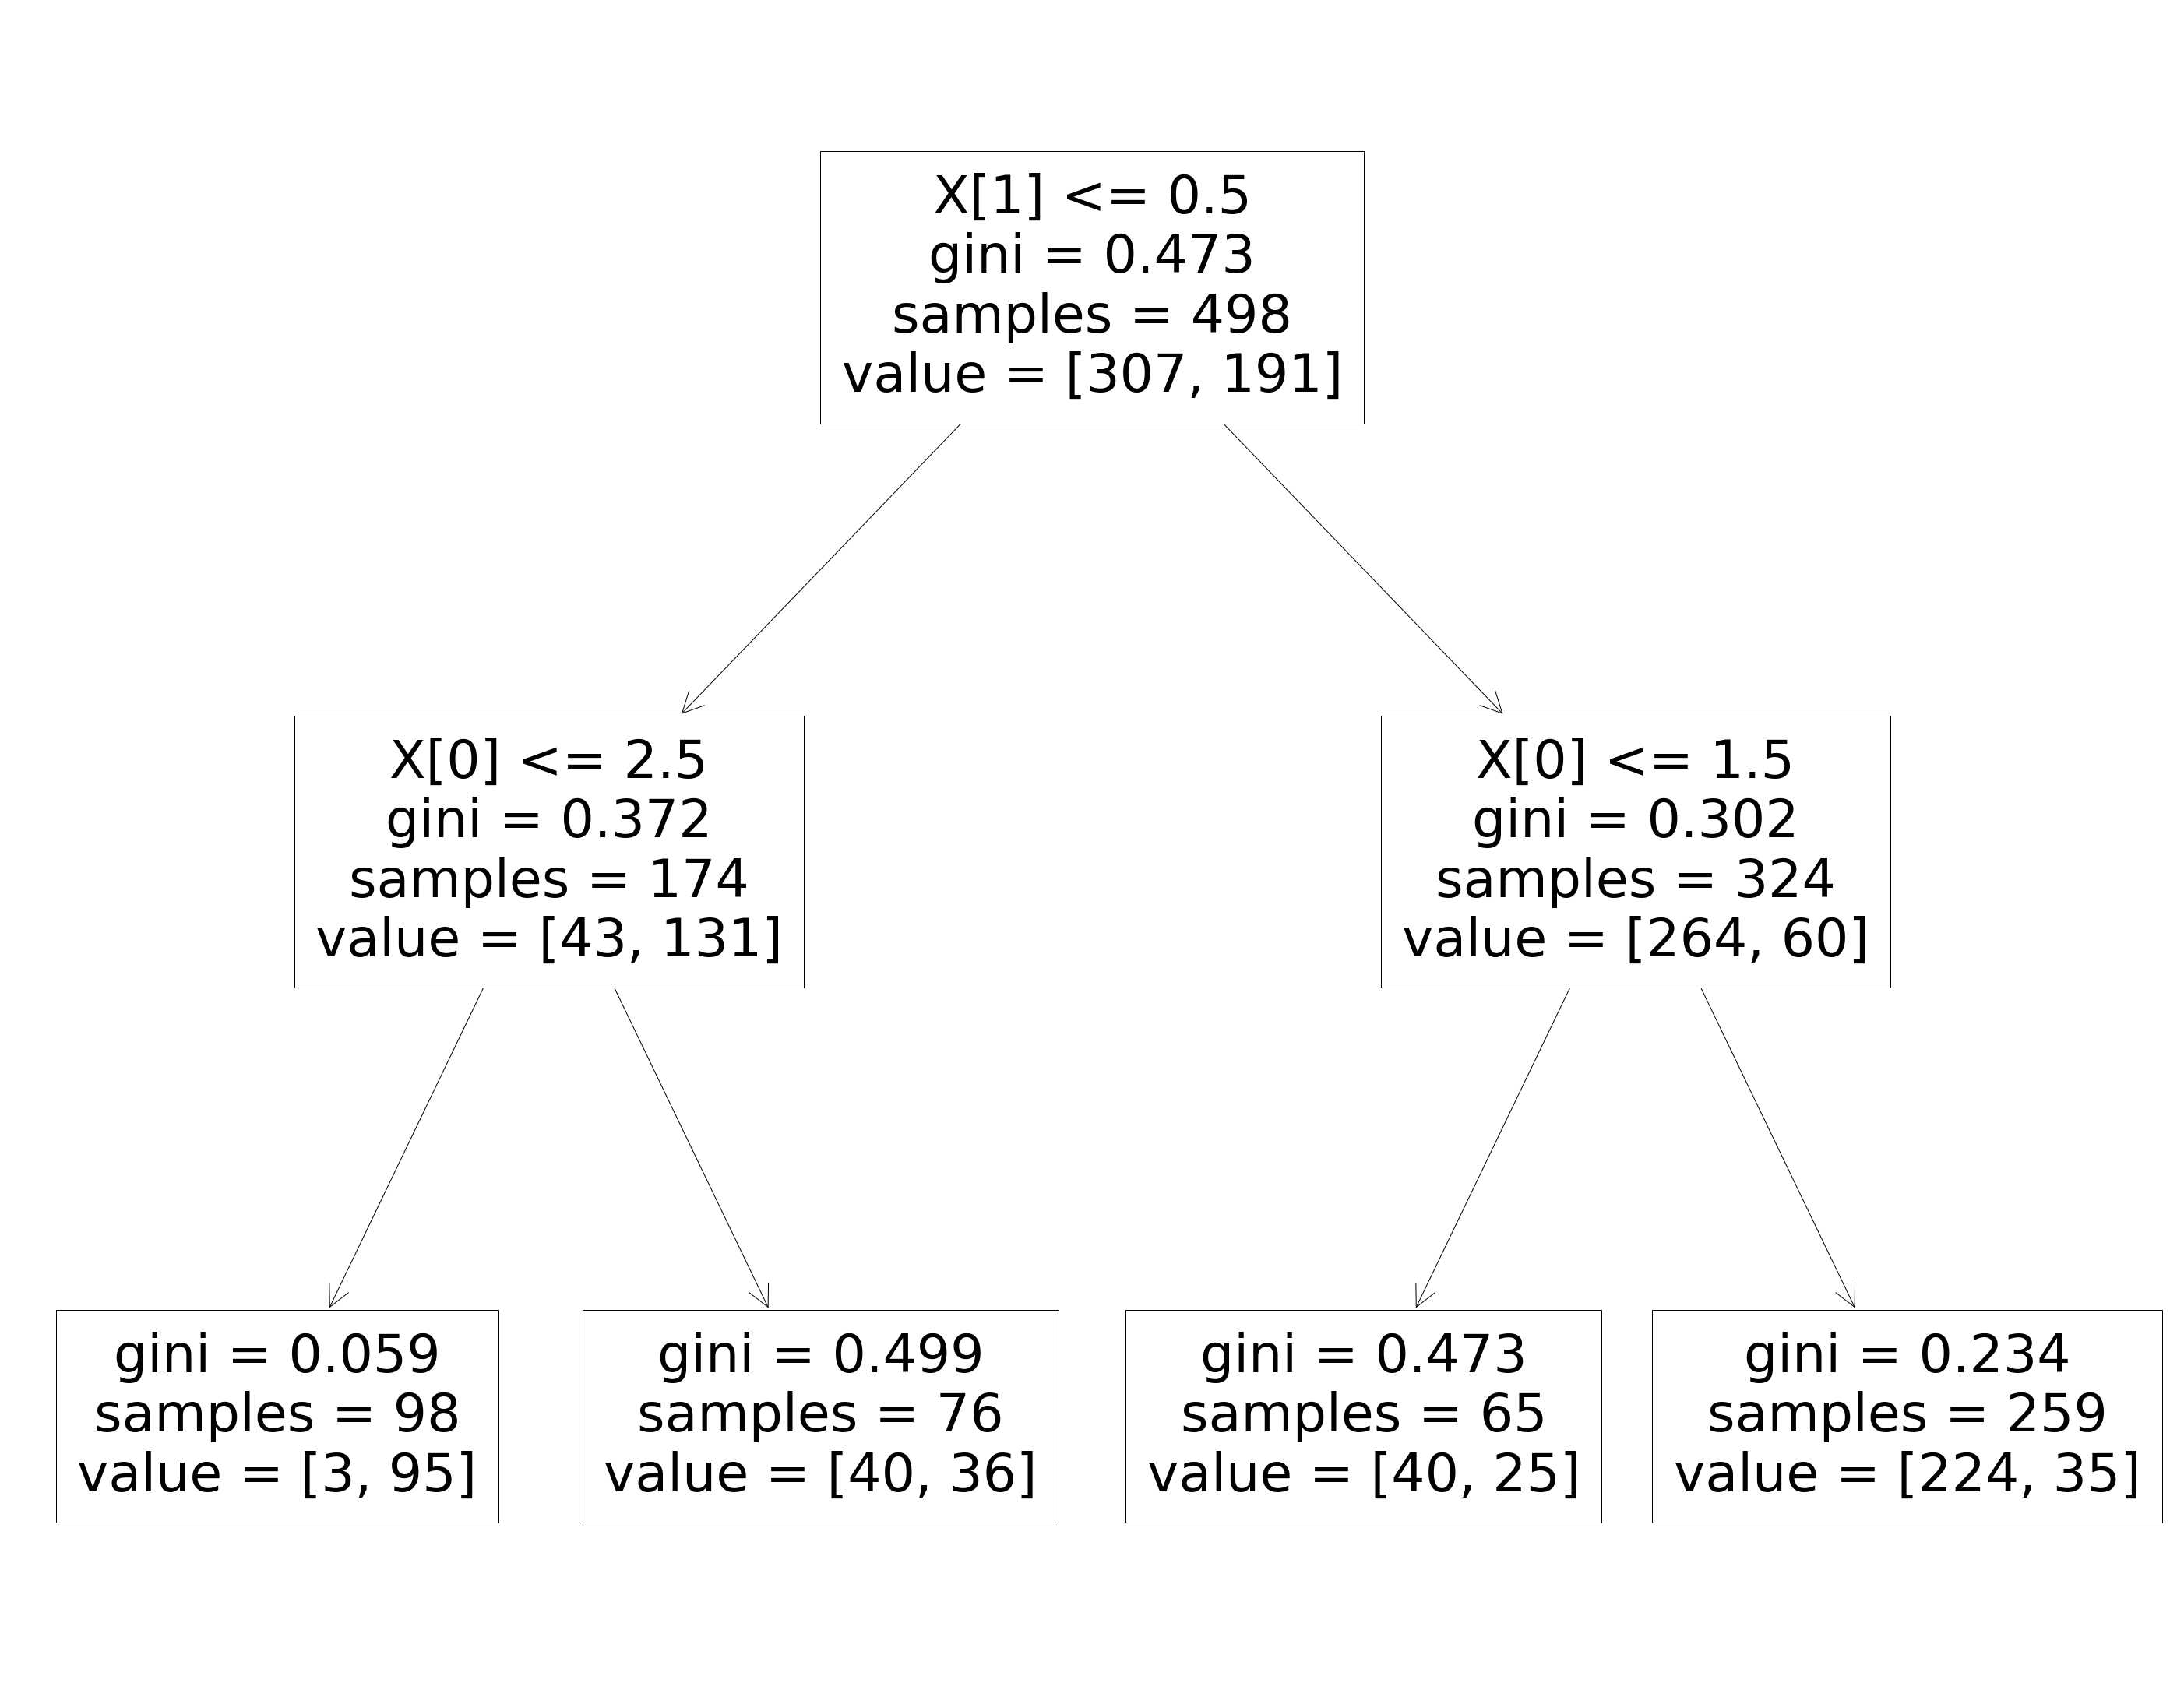

In [103]:
plt.figure(figsize = [50,40])
plt.show(plot_tree(model2))

In [104]:
train['model2_pred'] = model2.predict(X_train)
train.head()

,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton,baseline,model1_pred,model2_pred
474,0,3,0,0,9.8375,1,0,0,1,0,1,0
370,1,1,1,0,55.4417,0,1,0,0,0,1,0
573,1,3,0,0,7.7500,1,0,1,0,0,1,0
110,0,1,0,0,52.0000,1,1,0,1,0,0,0
167,0,3,1,4,27.9000,0,0,0,1,0,0,0


In [105]:
validate['model2_pred'] = model2.predict(X_validate)
validate.head()

,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton,model1_pred,model2_pred
569,1,3,0,0,7.8542,1,1,0,1,0,0
532,0,3,1,1,7.2292,0,1,0,0,0,0
223,0,3,0,0,7.8958,1,1,0,1,0,0
35,0,1,1,0,52.0000,0,1,0,1,1,0
93,0,3,1,2,20.5750,0,1,0,1,0,0


In [106]:
print(classification_report(train.survived, train.model2_pred))

              precision    recall  f1-score   support

           0       0.76      0.99      0.86       307
           1       0.97      0.50      0.66       191

    accuracy                           0.80       498
   macro avg       0.86      0.74      0.76       498
weighted avg       0.84      0.80      0.78       498



In [107]:
print(f'Train model is {model2.score(X_train, y_train):.2%}')
print(f'Validate model is {model2.score(X_validate, y_validate):.2%}')

Train model is 80.12%
Validate model is 76.17%


In [108]:
confusion_matrix(train.survived, train.model2_pred)

array([[304,   3],
       [ 96,  95]])

In [109]:
print(classification_report(validate.survived, validate.model2_pred))

              precision    recall  f1-score   support

           0       0.73      0.97      0.83       132
           1       0.90      0.43      0.58        82

    accuracy                           0.76       214
   macro avg       0.81      0.70      0.71       214
weighted avg       0.80      0.76      0.74       214



In [110]:
val_matrix2 = confusion_matrix(validate.survived, validate.model2_pred)
val_matrix2

array([[128,   4],
       [ 47,  35]])

In [111]:
print(f'Validate model accuracy is {model2.score(X_validate, y_validate):.2%}')

Validate model accuracy is 76.17%


In [112]:
tpr2 = val_matrix2[1,1] / (val_matrix2[1,1] + val_matrix2[1,0])
fpr2 = val_matrix2[0,1] / (val_matrix2[0,1] + val_matrix2[0,0])
tnr2 = val_matrix2[0,0] / (val_matrix2[0,0] + val_matrix2[0,1])
fnr2 = val_matrix2[1,0] / (val_matrix2[1,1] + val_matrix2[1,0])
print(f'True positive rate is {tpr2:.2%}')
print(f'False positive rate is {fpr2:.2%}')
print(f'True negative rate is {tnr2:.2%}')
print(f'False negative rate is {tnr2:.2%}')

True positive rate is 42.68%
False positive rate is 3.03%
True negative rate is 96.97%
False negative rate is 96.97%


### 7. Which model performs better on your out-of-sample data?

In [113]:
print('Model accuracies:')
print('-_-_-_-_-_-_-_-_-_-_-_-_-_-')
print(' ')
print(f'Train model1 is {model1.score(X_train, y_train):.2%}')
print(f'Validate model1 is {model1.score(X_validate, y_validate):.2%}')
print('---------------------------')
print(f'Train model2 is {model2.score(X_train, y_train):.2%}')
print(f'Validate model2 is {model2.score(X_validate, y_validate):.2%}')

Model accuracies:
-_-_-_-_-_-_-_-_-_-_-_-_-_-
 
Train model1 is 81.33%
Validate model1 is 74.30%
---------------------------
Train model2 is 80.12%
Validate model2 is 76.17%


In [114]:
print('Validate model metrics:')
print('-_-_-_-_-_-_-_-_-_-_-_-_-_-')
print(' ')

print(f'True positive rate for model1 is {tpr:.2%}')
print(f'False positive rate for model1 is  {fpr:.2%}')
print(f'True negative rate for model1 is {tnr:.2%}')
print(f'False negative rate for model 1 is {fnr:.2%}')
print('---------------------------')
print(f'True positive rate for model2 is {tpr2:.2%}')
print(f'False positive rate for model2 is {fpr2:.2%}')
print(f'True negative rate for model2 is {tnr2:.2%}')
print(f'False negative rate for model2 is {tnr2:.2%}')

Validate model metrics:
-_-_-_-_-_-_-_-_-_-_-_-_-_-
 
True positive rate for model1 is 56.10%
False positive rate for model1 is  14.39%
True negative rate for model1 is 85.61%
False negative rate for model 1 is 43.90%
---------------------------
True positive rate for model2 is 42.68%
False positive rate for model2 is 3.03%
True negative rate for model2 is 96.97%
False negative rate for model2 is 96.97%


#### Model 2 performs better on out of sample data

### 6. Which model performs better on your in-sample data?

In [115]:
t_matrix1 = confusion_matrix(train.survived, train.model1_pred)

In [116]:
t_tpr = t_matrix1[1,1] / (t_matrix1[1,1] + t_matrix1[1,0])
t_fpr = t_matrix1[0,1] / (t_matrix1[0,1] + t_matrix1[0,0])
t_tnr = t_matrix1[0,0] / (t_matrix1[0,0] + t_matrix1[0,1])
t_fnr = t_matrix1[1,0] / (t_matrix1[1,1] + t_matrix1[1,0])

In [117]:
t_matrix2 = confusion_matrix(train.survived, train.model2_pred)

In [118]:
t_tpr2 = t_matrix2[1,1] / (t_matrix2[1,1] + t_matrix2[1,0])
t_fpr2 = t_matrix2[0,1] / (t_matrix2[0,1] + t_matrix2[0,0])
t_tnr2 = t_matrix2[0,0] / (t_matrix2[0,0] + t_matrix2[0,1])
t_fnr2 = t_matrix2[1,0] / (t_matrix2[1,1] + t_matrix2[1,0])

In [119]:
print('Train model metrics:')
print('-_-_-_-_-_-_-_-_-_-_-_-_-_-')
print(' ')
print(f'True positive rate for model1 is {t_tpr:.2%}')
print(f'False positive rate for model1 is  {t_fpr:.2%}')
print(f'True negative rate for model1 is {t_tnr:.2%}')
print(f'False negative rate for model 1 is {t_fnr:.2%}')
print('---------------------------')
print(f'True positive rate for model2 is {t_tpr2:.2%}')
print(f'False positive rate for model2 is {t_fpr2:.2%}')
print(f'True negative rate for model2 is {t_tnr2:.2%}')
print(f'False negative rate for model2 is {t_tnr2:.2%}')

Train model metrics:
-_-_-_-_-_-_-_-_-_-_-_-_-_-
 
True positive rate for model1 is 66.49%
False positive rate for model1 is  9.45%
True negative rate for model1 is 90.55%
False negative rate for model 1 is 33.51%
---------------------------
True positive rate for model2 is 49.74%
False positive rate for model2 is 0.98%
True negative rate for model2 is 99.02%
False negative rate for model2 is 99.02%


#### Model 1 performs better on in sample data 

In [ ]:
X_train, y_train = train[X_cols], train[y_col]
X_validate, y_validate = validate[X_cols], validate[y_col]
X_test, y_test = test[X_cols], test[y_col]

In [12]:
def run_metrics(model, data_set):
    """
    This function takes in a model and ouputs metrics. 
    model = name of class model
    data_set = train, validate, test (AS A STRING)
    Will output the Precision Score, the classification report, and the confusion matrix
    It is advisable to print the name of the model you're working with before hand for clarity
    i.e. print('Metrics for Model 1 with Train data\n')
    """
    if data_set == 'train':
        X = X_train
        y = y_train
        df = train
    if data_set == 'validate':
        X = X_validate
        y = y_validate
        df = validate
    if data_set == 'test':
        X = X_test
        y = y_test
        df = test
    score = model.score(X, y)
    matrix = confusion_matrix(y, model.predict(X))
    tpr = matrix[1,1] / (matrix[1,1] + matrix[1,0])
    fpr = matrix[0,1] / (matrix[0,1] + matrix[0,0])
    tnr = matrix[0,0] / (matrix[0,0] + matrix[0,1])
    fnr = matrix[1,0] / (matrix[1,1] + matrix[1,0])
    prc = matrix[1,1] / (matrix[1,1] + matrix[0,1])
    
    print(f'{data_set} data set accuracy score: {score:.2%}')
    print(f'{data_set} data set precision score {prc:.2%}')
    print(f'{data_set} data set recall score: {tpr:.2%}\n')
    class_report = classification_report(y, model.predict(X), zero_division=True)
    print('-------------------------------')
    print(f'classification report')
    print(class_report)
    print ('-------------------------------\n')
    print('confusion matrix')
    print(f'{matrix}\n')
    print(f'{data_set} data set model metrics')
    print('---------------------------------')
    print(f'True positive rate for the model is {tpr:.2%}')
    print(f'False positive rate for the model is  {fpr:.2%}')
    print(f'True negative rate for the model is {tnr:.2%}')
    print(f'False negative rate for the model is {fnr:.2%}\n')

# Random Forest Exercises
Continue working in your model file with titanic data to do the following:

### 1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10

In [122]:
rf = RandomForestClassifier(random_state = 123, min_samples_leaf = 1, max_depth = 10)
rf

RandomForestClassifier(max_depth=10, random_state=123)

In [123]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=123)

In [124]:
print(rf.feature_importances_)

[0.32047233 0.56133392 0.11819375]


In [125]:
train['baseline'] = 0
baseline_accuracy = (train.baseline == train.survived).mean()
print(f'Baseline accuracy is {baseline_accuracy:.2%}')

Baseline accuracy is 61.65%


In [126]:
run_metrics(rf, 'train')

train data set accuracy score: 81.33%
train data set precision score 81.41%
train data set recall score: 66.49%
-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       307
           1       0.81      0.66      0.73       191

    accuracy                           0.81       498
   macro avg       0.81      0.79      0.79       498
weighted avg       0.81      0.81      0.81       498

-------------------------------

confusion matrix
[[278  29]
 [ 64 127]]
 
train data set model metrics
---------------------------------
True positive rate for the model is 66.49%
False positive rate for the model is  9.45%
True negative rate for the model is 90.55%
False negative rate for the model is 33.51%


In [127]:
run_metrics(rf, 'validate')

validate data set accuracy score: 74.30%
validate data set precision score 70.77%
validate data set recall score: 56.10%
-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.76      0.86      0.80       132
           1       0.71      0.56      0.63        82

    accuracy                           0.74       214
   macro avg       0.73      0.71      0.72       214
weighted avg       0.74      0.74      0.74       214

-------------------------------

confusion matrix
[[113  19]
 [ 36  46]]
 
validate data set model metrics
---------------------------------
True positive rate for the model is 56.10%
False positive rate for the model is  14.39%
True negative rate for the model is 85.61%
False negative rate for the model is 43.90%


### 4. Run through steps increasing your min_samples_leaf and decreasing your max_depth.

In [128]:
rf2 = RandomForestClassifier(random_state = 123, min_samples_leaf = 20, max_depth = 4)
rf2.fit(X_train, y_train)
pd.Series(dict(zip(X_train.columns, rf2.feature_importances_)))

pclass      0.363572
sex_male    0.497045
alone       0.139383
dtype: float64

In [129]:
run_metrics(rf2, 'train')

train data set accuracy score: 81.33%
train data set precision score 81.41%
train data set recall score: 66.49%
-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       307
           1       0.81      0.66      0.73       191

    accuracy                           0.81       498
   macro avg       0.81      0.79      0.79       498
weighted avg       0.81      0.81      0.81       498

-------------------------------

confusion matrix
[[278  29]
 [ 64 127]]
 
train data set model metrics
---------------------------------
True positive rate for the model is 66.49%
False positive rate for the model is  9.45%
True negative rate for the model is 90.55%
False negative rate for the model is 33.51%


In [130]:
run_metrics(rf2, 'validate')

validate data set accuracy score: 74.30%
validate data set precision score 70.77%
validate data set recall score: 56.10%
-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.76      0.86      0.80       132
           1       0.71      0.56      0.63        82

    accuracy                           0.74       214
   macro avg       0.73      0.71      0.72       214
weighted avg       0.74      0.74      0.74       214

-------------------------------

confusion matrix
[[113  19]
 [ 36  46]]
 
validate data set model metrics
---------------------------------
True positive rate for the model is 56.10%
False positive rate for the model is  14.39%
True negative rate for the model is 85.61%
False negative rate for the model is 43.90%


In [131]:
run_metrics(rf2, 'test')

test data set accuracy score: 80.45%
test data set precision score 80.36%
test data set recall score: 65.22%
-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       110
           1       0.80      0.65      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.78       179
weighted avg       0.80      0.80      0.80       179

-------------------------------

confusion matrix
[[99 11]
 [24 45]]
 
test data set model metrics
---------------------------------
True positive rate for the model is 65.22%
False positive rate for the model is  10.00%
True negative rate for the model is 90.00%
False negative rate for the model is 34.78%


### 5. What are the differences in the evaluation metrics? Which perfomrs better on your in-sample data? Why?

False positives and negatives are higher in my first random tree validate sample. My first model performs better on my in sample data than my second in terms of positive values, but my second is a big more agressive on negative values

In [ ]:
run_metrics(rf2, 'test')

# K Nearest Neighbors exercise

### 1. Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

In [80]:
for k in range(1, 13):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    taccuracy = knn.score(X_test, y_test)
    vaccuracy = knn.score(X_validate, y_validate)
    print(f'{k:2d}: Test accuracy = {taccuracy:.2%}, Validate accuracy = {vaccuracy:.2%}')

 1: Test accuracy = 78.21%, Validate accuracy = 73.36%
 2: Test accuracy = 77.65%, Validate accuracy = 76.17%
 3: Test accuracy = 73.18%, Validate accuracy = 68.69%
 4: Test accuracy = 77.65%, Validate accuracy = 76.17%
 5: Test accuracy = 77.65%, Validate accuracy = 76.17%
 6: Test accuracy = 77.65%, Validate accuracy = 76.17%
 7: Test accuracy = 77.65%, Validate accuracy = 76.17%
 8: Test accuracy = 77.65%, Validate accuracy = 76.17%
 9: Test accuracy = 77.65%, Validate accuracy = 76.17%
10: Test accuracy = 77.65%, Validate accuracy = 76.17%
11: Test accuracy = 77.65%, Validate accuracy = 76.17%
12: Test accuracy = 77.65%, Validate accuracy = 76.17%


In [72]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [73]:
run_metrics(knn, 'train')

train data set accuracy score: 78.31%
train data set precision score 79.43%
train data set recall score: 58.64%
-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       307
           1       0.79      0.59      0.67       191

    accuracy                           0.78       498
   macro avg       0.79      0.75      0.76       498
weighted avg       0.78      0.78      0.77       498

-------------------------------

confusion matrix
[[278  29]
 [ 79 112]]
 
train data set model metrics
---------------------------------
True positive rate for the model is 58.64%
False positive rate for the model is  9.45%
True negative rate for the model is 90.55%
False negative rate for the model is 41.36%


In [75]:
run_metrics(knn, 'validate')

validate data set accuracy score: 73.36%
validate data set precision score 69.23%
validate data set recall score: 54.88%
-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.75      0.85      0.80       132
           1       0.69      0.55      0.61        82

    accuracy                           0.73       214
   macro avg       0.72      0.70      0.70       214
weighted avg       0.73      0.73      0.73       214

-------------------------------

confusion matrix
[[112  20]
 [ 37  45]]
 
validate data set model metrics
---------------------------------
True positive rate for the model is 54.88%
False positive rate for the model is  15.15%
True negative rate for the model is 84.85%
False negative rate for the model is 45.12%


In [74]:
knn10 = KNeighborsClassifier(n_neighbors=10)
knn10.fit(X_train, y_train)
run_metrics(knn10, 'train')

train data set accuracy score: 80.12%
train data set precision score 96.94%
train data set recall score: 49.74%
-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.76      0.99      0.86       307
           1       0.97      0.50      0.66       191

    accuracy                           0.80       498
   macro avg       0.86      0.74      0.76       498
weighted avg       0.84      0.80      0.78       498

-------------------------------

confusion matrix
[[304   3]
 [ 96  95]]
 
train data set model metrics
---------------------------------
True positive rate for the model is 49.74%
False positive rate for the model is  0.98%
True negative rate for the model is 99.02%
False negative rate for the model is 50.26%


In [77]:
run_metrics(knn10, 'validate')

validate data set accuracy score: 76.17%
validate data set precision score 89.74%
validate data set recall score: 42.68%
-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.73      0.97      0.83       132
           1       0.90      0.43      0.58        82

    accuracy                           0.76       214
   macro avg       0.81      0.70      0.71       214
weighted avg       0.80      0.76      0.74       214

-------------------------------

confusion matrix
[[128   4]
 [ 47  35]]
 
validate data set model metrics
---------------------------------
True positive rate for the model is 42.68%
False positive rate for the model is  3.03%
True negative rate for the model is 96.97%
False negative rate for the model is 57.32%


In [78]:
knn20 = KNeighborsClassifier(n_neighbors=20)
knn20.fit(X_train, y_train)
run_metrics(knn20, 'train')

train data set accuracy score: 80.12%
train data set precision score 96.94%
train data set recall score: 49.74%
-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.76      0.99      0.86       307
           1       0.97      0.50      0.66       191

    accuracy                           0.80       498
   macro avg       0.86      0.74      0.76       498
weighted avg       0.84      0.80      0.78       498

-------------------------------

confusion matrix
[[304   3]
 [ 96  95]]
 
train data set model metrics
---------------------------------
True positive rate for the model is 49.74%
False positive rate for the model is  0.98%
True negative rate for the model is 99.02%
False negative rate for the model is 50.26%


In [140]:
run_metrics(knn20, 'validate')

validate data set accuracy score: 76.17%
validate data set precision score 89.74%
validate data set recall score: 42.68%
-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.73      0.97      0.83       132
           1       0.90      0.43      0.58        82

    accuracy                           0.76       214
   macro avg       0.81      0.70      0.71       214
weighted avg       0.80      0.76      0.74       214

-------------------------------

confusion matrix
[[128   4]
 [ 47  35]]
 
validate data set model metrics
---------------------------------
True positive rate for the model is 42.68%
False positive rate for the model is  3.03%
True negative rate for the model is 96.97%
False negative rate for the model is 57.32%


In [149]:
for k in range(1, 13):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    taccuracy = knn.score(X_test, y_test)
    vaccuracy = knn.score(X_validate, y_validate)
    print(f'{k:2d}: Test accuracy = {taccuracy:.2%}, Validate accuracy = {vaccuracy:.2%}\n')
    run_metrics(knn, 'train')
    run_metrics(knn, 'validate')
    print(f'_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-\n')

 1: Test accuracy = 78.21%, Validate accuracy = 73.36%

train data set accuracy score: 78.31%
train data set precision score 79.43%
train data set recall score: 58.64%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       307
           1       0.79      0.59      0.67       191

    accuracy                           0.78       498
   macro avg       0.79      0.75      0.76       498
weighted avg       0.78      0.78      0.77       498

-------------------------------

confusion matrix
[[278  29]
 [ 79 112]]

train data set model metrics
---------------------------------
True positive rate for the model is 58.64%
False positive rate for the model is  9.45%
True negative rate for the model is 90.55%
False negative rate for the model is 41.36%

validate data set accuracy score: 73.36%
validate data set precision score 69.23%
validate data set recall score: 54.88%

----------------

# Logistic Regression Exercises

In [9]:
train.head()

,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
474,0,3,0,0,9.8375,1,0,0,1
370,1,1,1,0,55.4417,0,1,0,0
573,1,3,0,0,7.7500,1,0,1,0
110,0,1,0,0,52.0000,1,1,0,1
167,0,3,1,4,27.9000,0,0,0,1


In [14]:
X_cols = ['pclass', 'sex_male', 'alone', 'fare']
y_col = 'survived'
X_train, y_train = train[X_cols], train[y_col]
X_validate, y_validate = validate[X_cols], validate[y_col]
X_test, y_test = test[X_cols], test[y_col]

In [15]:
logit = LogisticRegression(class_weight='balanced', random_state=123)

In [16]:
logit.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=123)

In [17]:
y_pred = logit.predict(X_train)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,

In [20]:
features = [ 'pclass', 'fare']
logit.fit(X_train[features], y_train)

LogisticRegression(class_weight='balanced', random_state=123)